In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

DETECTION_COLOR_DICT = {'Car':(255,255,0),'Pedestrian':(0,226,255),'Cyclist':(141,40,255)}

COLUMN_NAMES = ['frame','track_id','type','truncated','occluded','alpha','bbox_left','bbox_top',
                    'bbox_right','bbox_bottom','height','width','length','pos_x','pos_y','pos_z','rot_y']

df = pd.read_csv('./a_data/tracking/training/label_02/0000.txt',header=None,sep=' ')
df.columns = COLUMN_NAMES
df.head()

df.loc[df.type.isin(['Truck','Van','Tram']),'type'] = 'Car'
df = df[df.type.isin(['Car','Pedestrian','Cyclist'])]
df

,frame,track_id,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,height,width,length,pos_x,pos_y,pos_z,rot_y
2,0,0,Car,0,0,-1.793451,296.744956,161.752147,455.226042,292.372804,2.000000,1.823255,4.433886,-4.552284,1.858523,13.410495,-2.115488
3,0,1,Cyclist,0,0,-1.936993,737.619499,161.531951,931.112229,374.000000,1.739063,0.824591,1.785241,1.640400,1.675660,5.776261,-1.675458
4,0,2,Pedestrian,0,0,-2.523309,1106.137292,166.576807,1204.470628,323.876144,1.714062,0.767881,0.972283,6.301919,1.652419,8.455685,-1.900245
7,1,0,Car,0,0,-1.796862,294.898777,156.024256,452.199718,284.621269,2.000000,1.823255,4.433886,-4.650955,1.766774,13.581085,-2.121565
8,1,1,Cyclist,0,0,-1.935205,745.017137,156.393157,938.839722,374.000000,1.739063,0.824591,1.785241,1.700640,1.640419,5.778596,-1.664456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,153,10,Car,0,2,-1.818856,680.294919,177.511028,842.313244,284.070033,1.524000,1.728591,3.894227,2.353367,1.622590,12.436503,-1.637280
1085,153,11,Car,0,2,1.864481,245.920800,194.456182,394.817829,286.444967,1.444000,1.595116,3.791789,-5.458963,1.908188,13.979427,1.497916
1086,153,12,Pedestrian,1,0,0.826456,1185.199080,151.165841,1241.000000,348.552707,1.688000,0.800000,0.884000,5.739732,1.500532,6.279632,1.543272
1087,153,13,Car,0,0,1.773993,344.361560,188.772369,430.531955,248.482384,1.422414,1.512803,3.707634,-6.033258,1.888008,19.788795,1.481180


In [2]:
box = np.array(df.loc[2,['bbox_left','bbox_top','bbox_right','bbox_bottom']])
box

array([296.744956, 161.752147, 455.226042, 292.372804], dtype=object)

<function matplotlib.pyplot.show(*args, **kw)>

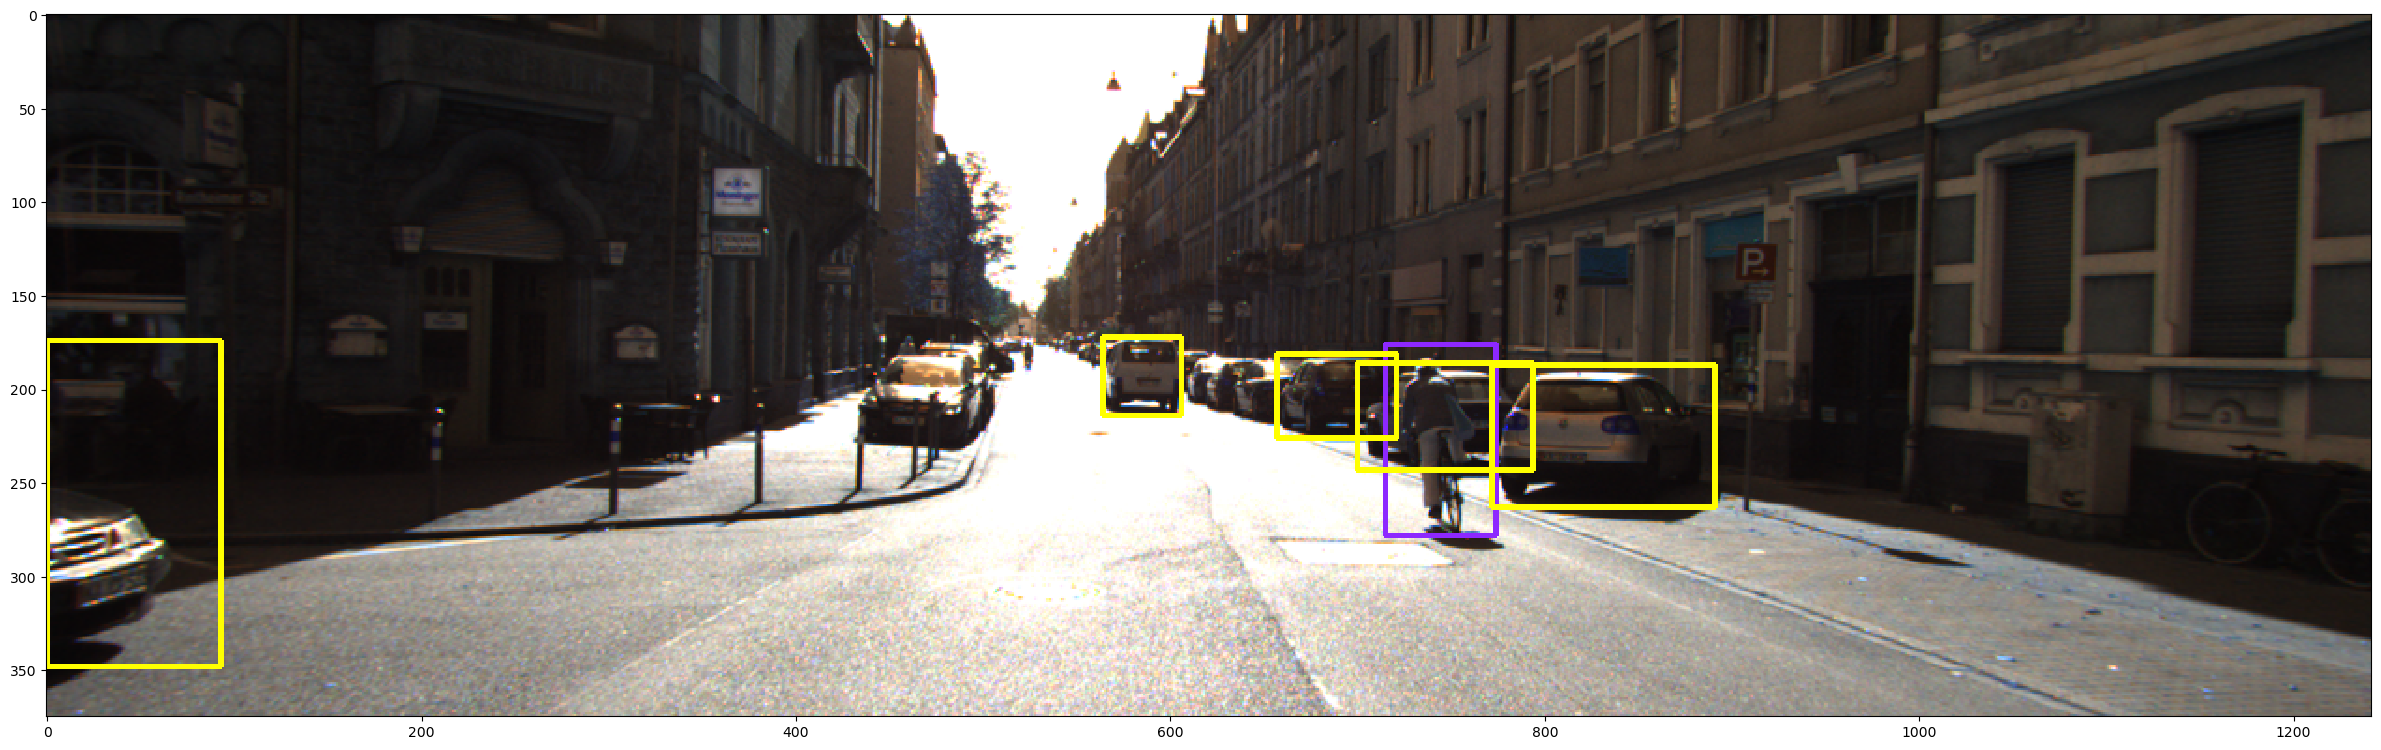

In [8]:
import cv2


frame = 120
image = cv2.imread('./a_data/RawData/2011_09_26/2011_09_26_drive_0005_sync/image_02/data/%010d.png'%frame)

# each frame boxes
boxes = np.array(df[df.frame==frame][['bbox_left','bbox_top','bbox_right','bbox_bottom']])
# diffrient colar of object in each frame
types = np.array(df[df.frame==frame]['type'])

for typ,box in zip(types,boxes):
    top_left =int(box[0]),int(box[1])
    bottom_right =int(box[2]),int(box[3])
    cv2.rectangle(image,top_left,bottom_right,DETECTION_COLOR_DICT[typ],2) 
    
# cv2.imshow("image",image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
fig, ax = plt.subplots(figsize=(30,25))
plt.imshow(image)
plt.show
